In [5]:
#importing libraries and datasets
import pandas as pd
import numpy as np
movies=pd.read_csv("C:\\Users\\MudraboinaSowryasree\\Downloads\\movies.csv")
links=pd.read_csv("C:\\Users\\MudraboinaSowryasree\\Downloads\\links.csv")
rating=pd.read_csv("C:\\Users\\MudraboinaSowryasree\\Downloads\\ratings.csv")
tags=pd.read_csv("C:\\Users\\MudraboinaSowryasree\\Downloads\\tags.csv")

# 1)The avilable .CSV files in the datatset are four(4).

In [7]:
# The shape of the movies dataset
movies.shape

(9742, 3)

In [9]:
# The shape of the ratings dataset
rating.shape

(100836, 4)

In [24]:
# The unique userId presnt in ratings.csv
count=rating['userId'].nunique()
print(count)

610


In [26]:
# The average user rating for movie named "Terminator 2: Judgment Day (1991)
merged_data = pd.merge(rating, movies, on='movieId')
terminator_2 = merged_data[merged_data['title'] == 'Terminator 2: Judgment Day (1991)']
average_rating = terminator_2['rating'].mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97


In [29]:
# The movie which has recieved the maximum number of user ratings
ratings_count = rating['movieId'].value_counts()
max_ratings_movie_id = ratings_count.idxmax()
max_ratings_movie_title = movies.loc[movies['movieId'] == max_ratings_movie_id, 'title'].values[0]
print(f"The movie that received the maximum number of user ratings is: {max_ratings_movie_title}")


The movie that received the maximum number of user ratings is: Forrest Gump (1994)


In [30]:
# The tags submitted by users to "Matrix, The (1999)" movie
matrix_movie_id = movies.loc[movies['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_tags = tags.loc[tags['movieId'] == matrix_movie_id, 'tag']
unique_matrix_tags = matrix_tags.unique()
print(f"Tags for 'Matrix, The (1999)': {unique_matrix_tags}")


Tags for 'Matrix, The (1999)': ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


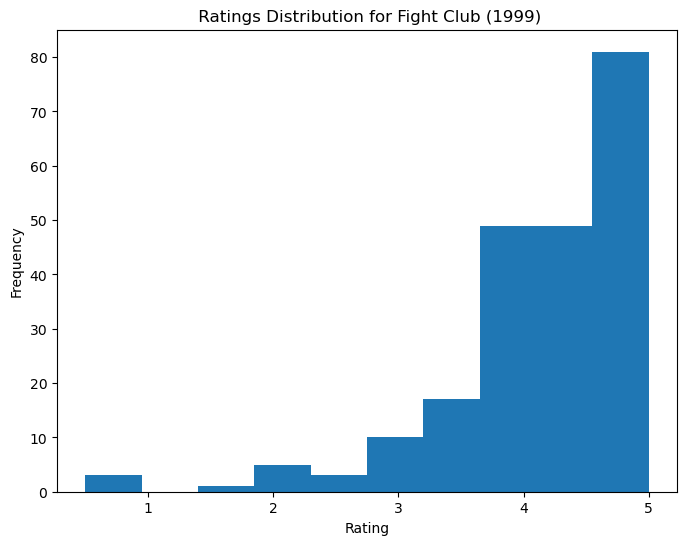

In [36]:
# The data distribution of user ratings for "Fight Club (1999)" movie looks like
import matplotlib.pyplot as plt
fight_club_movie_id = movies.loc[movies['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_ratings = rating.loc[rating['movieId'] == fight_club_movie_id, 'rating']
plt.figure(figsize=(8, 6))
plt.hist(fight_club_ratings, bins=10)
plt.title(' Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [56]:
# mandatory Operations
# Grouping the user ratings based on movieId and apply aggregation operations like count and mean on ratings
grouped_ratings = rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Applying inner join on dataframe created from movies.csv and the grouped df from step 1
merged_data = pd.merge(grouped_ratings, movies, on='movieId', how='inner')

# Filtering only those movies which have more than 50 user ratings (i.e. > 50)
filtered_movies = merged_data[merged_data['count'] > 50]

# Display the resulting dataframe with movies having more than 50 ratings
print(filtered_movies)


      movieId  count      mean                             title  \
0           1    215  3.920930                  Toy Story (1995)   
1           2    110  3.431818                    Jumanji (1995)   
2           3     52  3.259615           Grumpier Old Men (1995)   
5           6    102  3.946078                       Heat (1995)   
6           7     54  3.185185                    Sabrina (1995)   
...       ...    ...       ...                               ...   
8287   106782     54  3.916667   Wolf of Wall Street, The (2013)   
8354   109374     52  3.778846  Grand Budapest Hotel, The (2014)   
8358   109487     73  3.993151               Interstellar (2014)   
8457   112852     59  4.050847    Guardians of the Galaxy (2014)   
8673   122904     54  3.833333                   Deadpool (2016)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                          

In [45]:
#  The most popular movie based on  average user ratings
if not filtered_movies.empty:
    highest_rated_movies = filtered_movies[filtered_movies['mean'] == filtered_movies['mean'].max()]['title']
    print(f"The most popular movie(s) based on average user ratings is/are:")
    for movie in highest_rated_movies:
        print(movie)
else:
    print("No movies in the dataset have more than 50 user ratings.")

The most popular movie(s) based on average user ratings is/are:
Shawshank Redemption, The (1994)


In [61]:
# The top 5 popular movies based on number of user ratings
sorted_movies = filtered_movies.sort_values(by='count', ascending=False)
top_5_popular_movies = sorted_movies.head(5)
print("The top 5 popular movies based on number of user ratings:")
for movie_title in top_5_popular_movies['title']:
    print(movie_title)


Options under top 5 popular movies based on number of user ratings:
Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [62]:
# The "third most popular" Sci-Fi movie based on the number of user ratings
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]
sorted_sci_fi = sci_fi_movies.sort_values(by='count', ascending=False)
if len(sorted_sci_fi) >= 3:
    third_most_popular_sci_fi = sorted_sci_fi.iloc[2]  # Third entry in zero-based index
    print(f"The third most popular Sci-Fi movie based on number of user ratings is: {third_most_popular_sci_fi['title']}")
else:
    print("There are not enough Sci-Fi movies with more than 50 ratings to determine the third most popular.")


The third most popular Sci-Fi movie based on number of user ratings is: Jurassic Park (1993)
